# Exploratory Data Analysis - Sports

(Level - Advanced)

● Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
● As a sports analysts, find out the most successful teams, players and factors
contributing win or loss of a team.
● Suggest teams or players a company should endorse for its products.
● You can choose any of the tool of your choice
(Python/R/Tableau/PowerBI/Excel/SAP/SAS)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
## function to add data to plot
def annot_plot(ax,w,h):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

In [4]:
#Reading Data
match_data=pd.read_csv('matches.csv')
deliveries_data=pd.read_csv('deliveries.csv')

In [5]:
season_data=match_data[['id','season','winner']]

complete_data=deliveries_data.merge(season_data,how='inner',left_on='match_id',right_on='id')

In [6]:
match_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
match_data['win_by']=np.where(match_data['win_by_runs']>0,'Bat first','Bowl first')

In [8]:
match_data.shape

(756, 19)

In [9]:
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [10]:
deliveries_data['runs']=deliveries_data['total_runs'].cumsum()

In [11]:
deliveries_data.shape

(179078, 22)

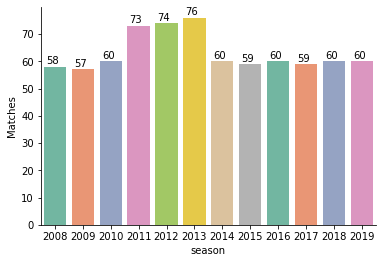

In [12]:
#Number of Matches played in each IPL season
ax=sns.countplot('season',data=match_data,palette="Set2")
plt.ylabel('Matches')
annot_plot(ax,0.08,1)

<AxesSubplot:ylabel='winner'>

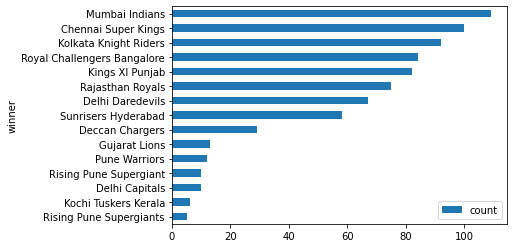

In [13]:
#Matches Won By the Teams
#Mumbai Indians won maximum number of matches followed by Chennai Super Kings
match_data.groupby('winner')['winner'].agg(['count']).sort_values('count').reset_index().plot(x='winner',y='count',kind='barh')

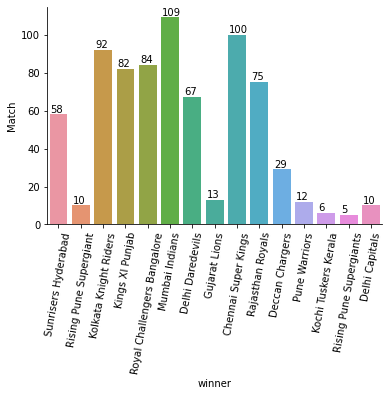

In [14]:
ax=sns.countplot(x='winner',data=match_data)
plt.ylabel('Match')
plt.xticks(rotation=80)
annot_plot(ax,0.05,1)

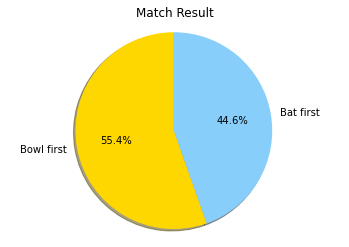

In [15]:
#Win Percentage
match=match_data.win_by.value_counts()
labels=np.array(match.index)
sizes = match.values
colors = ['gold', 'lightskyblue']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Match Result')
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='season', ylabel='count'>

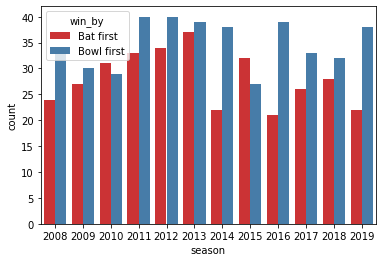

In [16]:
sns.countplot('season',hue='win_by',data=match_data,palette="Set1")

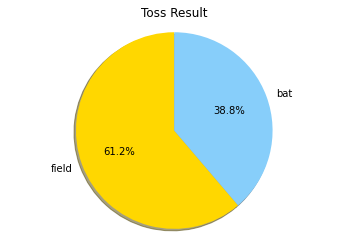

In [17]:
#Toss Decisions so far
toss=match_data.toss_decision.value_counts()
labels=np.array(toss.index)
sizes = toss.values
colors = ['gold', 'lightskyblue']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Toss Result')
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='season', ylabel='count'>

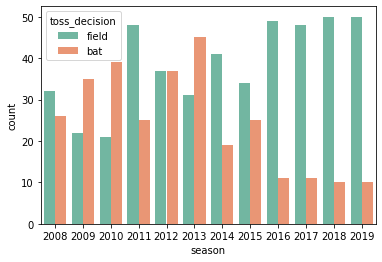

In [18]:
sns.countplot('season',hue='toss_decision',data=match_data,palette="Set2")

In [19]:
#IPL Winners
final_matches=match_data.drop_duplicates(subset=['season'], keep='last')
final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


In [21]:
#Orange Cap Winners
Season_purple_cap=complete_data[complete_data["dismissal_kind"]!="run out"]
Season_purple_cap=complete_data.groupby(["season","bowler"])["dismissal_kind"].count().reset_index().sort_values(by="dismissal_kind",ascending=False).reset_index(drop=True)
Season_purple_cap= Season_purple_cap.drop_duplicates(subset=["season"],keep="first").sort_values(by="season").reset_index(drop=True)
Season_purple_cap.columns= ["Season","Bowler","Wicket_taken"]
ax=Season_purple_cap.plot(['Bowler','Season'],'Wicket_taken',color='purple',kind='bar')
plt.xticks(rotation=80)
annot_plot(ax,0,1)
Season_purple_cap

ValueError: x must be a label or position